### L2 Regularization (Linear regression + weight decay)

Epoch 0 | Loss: 893.2339
Epoch 20 | Loss: 7.6486
Epoch 40 | Loss: 7.0148
Epoch 60 | Loss: 6.4964
Epoch 80 | Loss: 6.0724
Epoch 100 | Loss: 5.7254
Epoch 120 | Loss: 5.4416
Epoch 140 | Loss: 5.2095
Epoch 160 | Loss: 5.0195
Epoch 180 | Loss: 4.8642


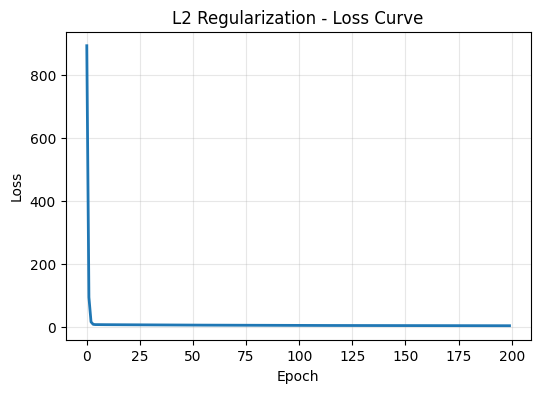

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# generate data
np.random.seed(42)
X = np.linspace(0, 10, 100)
y = 3 * X + 5 + np.random.randn(100) * 2

# initialize parameters
w = np.random.randn()
b = 0.0
lr = 0.01
lambda_l2 = 0.1
epochs = 200

losses = []

# Training loop
for epoch in range(epochs):
    y_pred = w * X + b

    mse = np.mean((y - y_pred) ** 2)
    l2_penalty = lambda_l2 * w**2
    loss = mse + l2_penalty
    losses.append(loss)

    dw = -2 * np.mean(X * (y - y_pred)) + 2 * lambda_l2 * w
    db = -2 * np.mean(y - y_pred)

    w -= lr * dw
    b -= lr * db

    if epoch % 20 == 0:
        print(f"Epoch {epoch} | Loss: {loss:.4f}")

# loss curve
plt.figure(figsize=(6,4))
plt.plot(losses, linewidth=2)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("L2 Regularization - Loss Curve")
plt.grid(alpha=0.3)
plt.show()

### Dropout

Original Activations:
 [[ 0.49671415 -0.1382643   0.64768854  1.52302986 -0.23415337 -0.23413696
   1.57921282  0.76743473 -0.46947439  0.54256004]
 [-0.46341769 -0.46572975  0.24196227 -1.91328024 -1.72491783 -0.56228753
  -1.01283112  0.31424733 -0.90802408 -1.4123037 ]
 [ 1.46564877 -0.2257763   0.0675282  -1.42474819 -0.54438272  0.11092259
  -1.15099358  0.37569802 -0.60063869 -0.29169375]
 [-0.60170661  1.85227818 -0.01349722 -1.05771093  0.82254491 -1.22084365
   0.2088636  -1.95967012 -1.32818605  0.19686124]
 [ 0.73846658  0.17136828 -0.11564828 -0.3011037  -1.47852199 -0.71984421
  -0.46063877  1.05712223  0.34361829 -1.76304016]]

Dropout Mask (1 = kept, 0 = dropped):
 [[0 1 0 1 1 0 0 1 1 1]
 [1 0 0 0 1 1 0 0 0 0]
 [1 1 1 0 0 1 1 1 1 0]
 [1 0 0 0 0 1 0 1 1 0]
 [0 1 0 0 0 0 1 1 1 1]]

After Dropout (scaled):
 [[ 0.         -0.2765286   0.          3.04605971 -0.46830675 -0.
   0.          1.53486946 -0.93894877  1.08512009]
 [-0.92683539 -0.          0.         -0.         -3

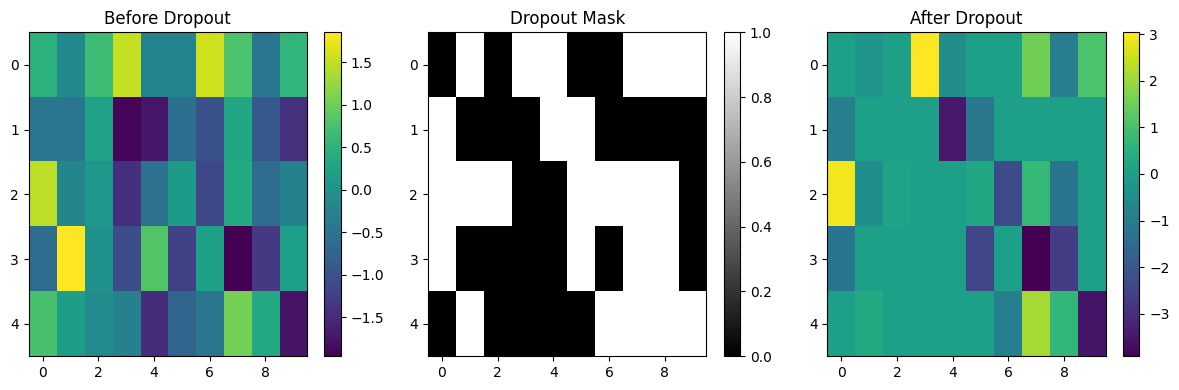

In [9]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

# Input (simulated neuron outputs)
X = np.random.randn(5, 10)
print("Original Activations:\n", X)

# Dropout function
def dropout(X, drop_prob=0.5):
    mask = (np.random.rand(*X.shape) > drop_prob)
    X_dropped = X * mask / (1 - drop_prob)
    return X_dropped, mask

# Apply Dropout
X_dropped, mask = dropout(X, drop_prob=0.5)

print("\nDropout Mask (1 = kept, 0 = dropped):\n", mask.astype(int))
print("\nAfter Dropout (scaled):\n", X_dropped)

# visualization
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.imshow(X, aspect="auto", cmap="viridis")
plt.title("Before Dropout")
plt.colorbar()

plt.subplot(1,3,2)
plt.imshow(mask, aspect="auto", cmap="gray")
plt.title("Dropout Mask")
plt.colorbar()

plt.subplot(1,3,3)
plt.imshow(X_dropped, aspect="auto", cmap="viridis")
plt.title("After Dropout")
plt.colorbar()

plt.tight_layout()
plt.show()